# Plots the changes in the RMS of the waveforms
This should be a measure of the galactic background and we should see an oscillation as the galactic center rotates around the antennas

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates
from datetime import datetime

In [24]:
%cd data/
%ls -l

[Errno 2] No such file or directory: 'data/'
/home/rturcotte/work/scripts/crazyIdeas/data
total 427450
-rw-r--r-- 1 rturcotte rturcotte      7798 Mar 22 06:05 2020Q1_DGD.csv
-rw-r--r-- 1 rturcotte rturcotte      7798 Mar 22 06:05 2020Q2_DGD.csv
-rw-r--r-- 1 rturcotte rturcotte      7878 Mar 22 06:05 2020Q3_DGD.csv
-rw-r--r-- 1 rturcotte rturcotte      7878 Mar 22 06:05 2020Q4_DGD.csv
-rw-rw-r-- 1 rturcotte rturcotte  14931204 May 12 05:16 BG2021.npz
-rw-rw-r-- 1 rturcotte rturcotte      2589 May 13 08:18 BG2021_cleaned.npz
-rw-rw-r-- 1 rturcotte rturcotte      3622 May 12 04:02 BGTest.npz
-rw-rw-r-- 1 rturcotte rturcotte      7122 Mar 26 05:55 averageDay.npz
-rw-rw-r-- 1 rturcotte rturcotte     36842 Mar  4 04:50 frame_dt_trig.csv
-rw-rw-r-- 1 rturcotte rturcotte     56702 Mar 15 18:11 frame_dt_trig_corr_20.csv
-rw-rw-r-- 1 rturcotte rturcotte     13616 Mar 16 05:37 frame_dt_trig_corr_21.csv
-rw-rw-r-- 1 rturcotte rturcotte     70318 Mar 16 05:44 frame_per_file_combined.csv
-rw-r--r-- 

## read the data from the .npz files

In [25]:
#data_20 = np.load("/home/rturcotte/work/scripts/crazyIdeas/data/BG2020.npz", allow_pickle=True)
data_21 = np.load("/home/rturcotte/work/scripts/crazyIdeas/data/BG2021.npz", allow_pickle=True)

In [13]:
rms_10, rms_11, rms_20, rms_21, rms_30, rms_31 = [], [], [], [], [], []
for i in range(200):#range(len(data_21["rms"])):
    rms_10.append(data_21["rms"][i][0])
    rms_11.append(data_21["rms"][i][1])
    rms_20.append(data_21["rms"][i][2])
    rms_21.append(data_21["rms"][i][3])
    rms_30.append(data_21["rms"][i][4])
    rms_31.append(data_21["rms"][i][5])

In [28]:
# np.savez("data/BG2021_cleaned.npz", time=times, rms10=rms_10, rms11=rms_11, rms20=rms_20, rms21=rms_21, rms30=rms_30, rms31=rms_31)
print(len(data_21["date"]))

82041


## plotting the data

In [14]:
dates, b=[], []
for i in range(200):
    dates.append(np.datetime64(data_21["date"][i]).astype(datetime))
    b.append(i)

(7.803688320892885, 60)

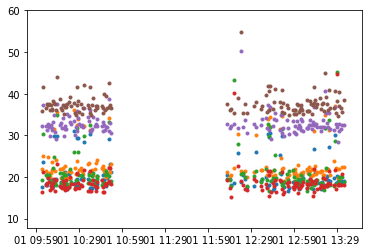

In [16]:
plt.plot_date(dates,rms_10,marker=".")
plt.plot_date(dates,rms_11,marker=".")
plt.plot_date(dates,rms_20,marker=".")
plt.plot_date(dates,rms_21,marker=".")
plt.plot_date(dates,rms_30,marker=".")
plt.plot_date(dates,rms_31,marker=".")
# a_21["date"][:10]))
# plt.plot_date(dates, values)

In [17]:
print(dates)

[datetime.datetime(2021, 1, 1, 10, 3, 20, 110075), datetime.datetime(2021, 1, 1, 10, 3, 56, 278202), datetime.datetime(2021, 1, 1, 10, 4, 32, 446329), datetime.datetime(2021, 1, 1, 10, 5, 8, 614456), datetime.datetime(2021, 1, 1, 10, 5, 44, 782583), datetime.datetime(2021, 1, 1, 10, 6, 20, 950710), datetime.datetime(2021, 1, 1, 10, 6, 57, 118837), datetime.datetime(2021, 1, 1, 10, 7, 33, 286964), datetime.datetime(2021, 1, 1, 10, 8, 9, 455092), datetime.datetime(2021, 1, 1, 10, 8, 45, 623219), datetime.datetime(2021, 1, 1, 10, 9, 21, 791346), datetime.datetime(2021, 1, 1, 10, 9, 57, 959473), datetime.datetime(2021, 1, 1, 10, 10, 34, 127600), datetime.datetime(2021, 1, 1, 10, 11, 10, 295727), datetime.datetime(2021, 1, 1, 10, 11, 46, 463854), datetime.datetime(2021, 1, 1, 10, 12, 22, 631981), datetime.datetime(2021, 1, 1, 10, 12, 58, 800108), datetime.datetime(2021, 1, 1, 10, 13, 34, 968235), datetime.datetime(2021, 1, 1, 10, 14, 11, 136362), datetime.datetime(2021, 1, 1, 10, 14, 47, 30

In [20]:
np.savez("/home/rturcotte/work/scripts/crazyIdeas/data/BG2021_cleaned.npz", time=dates, rms10=rms_10, rms11=rms_11, rms20=rms_20, rms21=rms_21, rms30=rms_30, rms31=rms_31)

In [21]:
data = np.load("/home/rturcotte/work/scripts/crazyIdeas/data/BG2021_cleaned.npz")
data.files

['time', 'rms10', 'rms11', 'rms20', 'rms21', 'rms30', 'rms31']

array([ 21.92261182,  24.97218305, 129.4853353 , 130.1349949 ,
       131.39664511,  21.557006  ,  20.22582348,  24.81952155,
        20.9038355 ,  20.09713184,  20.98523288,  21.76220961,
        23.63103199,  21.81136228,  31.50708809,  21.37188692,
        24.05392601,  35.65714248, 131.49796342, 130.18570473,
       129.8090507 ,  21.9848859 ,  19.65810712,  21.93175424,
        22.12306163,  19.76113534,  22.5236354 ,  20.91466571,
        19.30076235,  19.789535  , 130.43011473,  21.37670479,
        19.66677823,  21.2030948 , 130.20758697, 133.02823314,
       130.85853535,  36.0543395 ,  22.14456995,  20.80609081,
        23.79435023,  32.43156113,  33.96405747,  21.65001848,
       130.9142975 ,  22.13098541,  21.33142703,  20.62499422,
        32.17611209, 131.43350004, 129.10005979, 129.43287154,
       132.20268894,  23.14755324,  23.24296156,  21.10590216,
        31.35091317,  20.82205743,  21.61822418,  20.59133322,
       129.87271227,  21.8487164 ,  23.43967437,  19.97